### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import csv
import openpyxl

### Data Preprocessing

#### Reading the files and Merging them

In [2]:
wb = openpyxl.Workbook()
ws = wb.active

with open('age_band.csv') as f:
    reader = csv.reader(f, delimiter=':')
    for row in reader:
        ws.append(row)

wb.save('age_band.xlsx')

In [3]:
xls = pd.ExcelFile('car_loan.xlsx')
xls1 = pd.ExcelFile('age_band.xlsx')
sheet1 = xls.parse(0)
sheet2 = xls.parse(1)
sheet3 = xls1.parse(0)

In [4]:
df=pd.concat([sheet1, sheet2, sheet3], axis=1)

In [5]:
df['Customer_id'] = df['cust.ID\tage-band \tDebt.To.Income.Ratio,'].str.split().str[0]
df['Age_band'] = df['cust.ID\tage-band \tDebt.To.Income.Ratio,'].str.split().str[1]
df['Debt_to_Income_ratio'] = df['cust.ID\tage-band \tDebt.To.Income.Ratio,'].str.split().str[2]
df.drop(columns=['cust.ID\tage-band \tDebt.To.Income.Ratio,'], axis=1, inplace=True)

#### Removing the duplicate columns

In [6]:
df = df.loc[:, ~df.columns.duplicated()]

In [7]:
df.drop(columns='Customer_id', axis=1, inplace=True)

In [8]:
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler,Age_band,Debt_to_Income_ratio
0,84563.0,8000,8000,7.62#,36 months,3500,765-769,NaN,yes,25-39,"0!,"
1,78765.0,9000,9000,10.16#,36 months,5166.67,710-714,10 + years,no,25-40,"13.76!,"
2,24590.0,13000,12975,9.99#,60 months,10500,800-804,10+ years,yes,25-41,"8.77!,"
3,9061.0,10000,10000,14.22#,36 months,2541.67,680-684,8 years,no,25-42,"12.24!,"
4,47011.0,3600,3600,13.67#,36 months,5113,690-694,NaN,yes,25-43,"16.41!,"
...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000,550,10.59#,36 months,2083.33,685-689,< 1 year,no,45-55,"10.22!,"
2182,84805.0,13225,13225,15.31#,36 months,5833.33,680-684,10+ years,yes,45-55,"27.07!,"
2183,101548.0,10000,525,14.7#,36 months,5416.67,645-649,< 1 year,no,45-55,"6.37!,"
2184,3209.0,12000,11725,9.63#,36 months,3000,750-754,< 1 year,yes,45-55,"15!,"


In [10]:
df['Amount.Requested for loan'].astype(float)

ValueError: could not convert string to float: '.'

In [9]:
df['Interest.Rate'] = df['Interest.Rate'].str.replace('#', '')

In [10]:
df['Loan duration'].str.split().str[0]

0       36
1       36
2       60
3       36
4       36
        ..
2181    36
2182    36
2183    36
2184    36
2185    36
Name: Loan duration, Length: 2186, dtype: object

AttributeError: '_io.TextIOWrapper' object has no attribute 'value_counts'

In [4]:
sheet3['cust.ID'] = sheet3['cust.ID\tage-band \tDebt.To.Income.Ratio,'].str.split('\t').str[0]
sheet3['age_band'] = sheet3['cust.ID\tage-band \tDebt.To.Income.Ratio,'].str.split('\t').str[1]
sheet3['Debt_to_Income_ratio'] = sheet3['cust.ID\tage-band \tDebt.To.Income.Ratio,'].str.split('\t').str[2]
sheet3.drop(columns='cust.ID\tage-band \tDebt.To.Income.Ratio,',inplace=True)

In [5]:
sheet3['cust.ID'] = pd.to_numeric(sheet3['cust.ID'], errors='coerce')

In [6]:
sheet3['a']= sheet3['age_band'].str.split('-').str[0]
sheet3['b'] = sheet3['age_band'].str.split('-').str[1]
sheet3.drop(columns='age_band', inplace=True)

In [7]:
sheet3['a'] = pd.to_numeric(sheet3['a'], errors='coerce')
sheet3['b'] = pd.to_numeric(sheet3['b'], errors='coerce')
sheet3['Age_band'] = (sheet3['a'] + sheet3['b'])/2
sheet3.drop(columns=['a', 'b'], inplace=True)

In [8]:
sheet3['Debt_to_Income_ratio'] =sheet3['Debt_to_Income_ratio'].str.replace('!', '').str.replace(',', '')

In [9]:
df = sheet3.merge(sheet1, on='cust.ID').merge(sheet2, on='cust.ID')



#### 1.  I) Check for duplicate columns & remove them

As per the understanding of the datasets, customer id acts as a primary key for all the three dataset. As i used merge function there is no duplicate values.

#### II) If you want you can drop column/columns (Mention the reason for the same for removing or not)

When we use concat method we will encounter with a duplicate columns as customer id, so we can drop the duplicate customer id colums. As i have perfomed merge function it will helps to maps the columns according to customer ID

In [10]:
df.loc[1563, 'Debt_to_Income_ratio']= '9.09'

In [11]:
df['Debt_to_Income_ratio'] = pd.to_numeric(df['Debt_to_Income_ratio'], errors='coerce')

#### 3. Clean the data (string cleaning)

In [13]:
df.dtypes

cust.ID                               float64
Debt_to_Income_ratio                  float64
Age_band                              float64
Amount.Requested for loan              object
Amount.Funded.By.Investors to bank     object
Interest.Rate                          object
Loan duration                          object
Family_incomeIncome                    object
credit_score                           object
Employment.Length                      object
owning a two wheeler                   object
dtype: object

In [59]:
df['Debt_to_Income_ratio'].value_counts()

0        7
12.54    6
15.88    5
16.15    5
14.11    4
        ..
18.89    1
9.95     1
1.49     1
30.24    1
6.37     1
Name: Debt_to_Income_ratio, Length: 1521, dtype: int64

In [18]:
New_df['Interest.Rate'] =New_df['Interest.Rate'].str.replace('#', '')
New_df['Interest.Rate'] = New_df['Interest.Rate'].astype(float)

New_df.loc[121, 'Family_incomeIncome'] = '6250'
New_df.loc[479, 'Family_incomeIncome'] = '8333.33'
New_df.loc[492, 'Family_incomeIncome'] = '7083.33'
New_df.loc[639, 'Family_incomeIncome'] = '4416.67'
New_df.loc[783, 'Family_incomeIncome'] = '8333.33'
New_df.loc[2146, 'Family_incomeIncome'] = '4000'
New_df['Family_incomeIncome'].astype(float)


New_df['Loan duration'] =New_df['Loan duration'].str.split().str[0]

#### 2. Using seaborn/matplotlib give any two visuals and mention the insights.


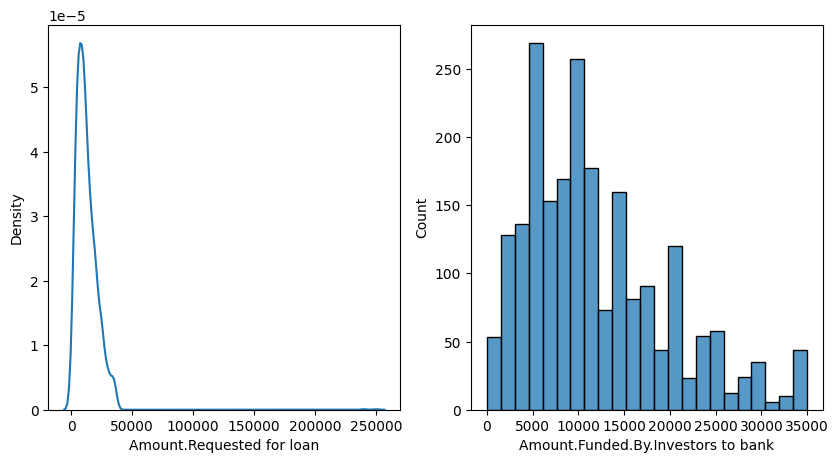

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.kdeplot(df['Age_band'])

plt.subplot(1,2,2)
sns.histplot(New_df['Amount.Funded.By.Investors to bank'])

plt.show()

#### Data Cleaning

In [4]:
sheet3['cust.ID'] = sheet3['cust.ID'].str.replace('"', '')
sheet3['Debt_to_Income_Ratio'] = sheet3['Debt_to_Income_Ratio'].str.replace('"', '').str.replace(',','').str.replace('!', '')
sheet3[sheet3['cust.ID'] == "NA"]
sheet3.loc[562, 'cust.ID'] = 0
sheet1.loc[562, 'cust.ID'] = 0
sheet2.loc[8, 'cust.ID'] = 88526.0
sheet2.loc[562, 'cust.ID'] = 0

#### Changing the datatypes

In [5]:
sheet1['cust.ID'].dtypes
sheet2['cust.ID'].dtypes
sheet3['cust.ID'].astype(float)

0        84563.0
1        78765.0
2        24590.0
3         9061.0
4        47011.0
          ...   
2181    101795.0
2182     84805.0
2183    101548.0
2184      3209.0
2185     42828.0
Name: cust.ID, Length: 2186, dtype: float64

#### Mergning and concating the dataframes

In [6]:
car = pd.merge(sheet1, sheet2, on='cust.ID')

In [7]:
df = pd.concat([car, sheet3], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2185
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cust.ID                             2186 non-null   float64
 1   Amount.Requested for loan           2185 non-null   object 
 2   Amount.Funded.By.Investors to bank  2185 non-null   object 
 3   Interest.Rate                       2186 non-null   object 
 4   Loan duration                       2185 non-null   object 
 5   Family_incomeIncome                 2183 non-null   object 
 6   credit_score                        2186 non-null   object 
 7   Employment.Length                   2119 non-null   object 
 8   owning a two wheeler                2185 non-null   object 
 9   cust.ID                             2186 non-null   object 
 10  Age_band                            2183 non-null   object 
 11  Debt_to_Income_Ratio                2186 no

In [9]:
df.dtypes

cust.ID                               float64
Amount.Requested for loan              object
Amount.Funded.By.Investors to bank     object
Interest.Rate                          object
Loan duration                          object
Family_incomeIncome                    object
credit_score                           object
Employment.Length                      object
owning a two wheeler                   object
cust.ID                                object
Age_band                               object
Debt_to_Income_Ratio                   object
dtype: object

#### Missing Values Imputation

In [ ]:
df['Amount.Requested for loan'].astype(int)

In [ ]:
df.loc[1667, 'Amount.Requested for loan'] = np.median(df['Amount.Requested for loan'])
df.loc[362, 'Amount.Requested for loan'] = np.median(df['Amount.Requested for loan'])
df.loc[1348, 'Amount.Requested for loan'] = np.median(df['Amount.Requested for loan'])
df.loc[1782, 'Amount.Requested for loan'] = np.median(df['Amount.Requested for loan'])
df.loc[1982, 'Amount.Requested for loan'] = np.median(df['Amount.Requested for loan'])

#### Identifying the ouliers in Amount Requested for Loan column

In [ ]:
New = df['Amount.Requested for loan'].sort_values()

In [ ]:
q1 = np.quantile(New, 0.25)

In [ ]:
q3 = np.quantile(New, 0.75)

In [ ]:
IQR = q3 - q1

In [ ]:
lower = q1-1.5*(IQR)
upper = q3+1.5*(IQR)
print(lower, upper)

In [ ]:
New_df =df[(df['Amount.Requested for loan'] > lower) & (df['Amount.Requested for loan'] < upper)]
New_df

In all three dataframes, we can notice that customer ID is common columns. so repeated columns can be removed.

#### Modification

In [12]:
New_df.columns

Index(['cust.ID', 'Amount.Requested for loan',
       'Amount.Funded.By.Investors to bank', 'Interest.Rate', 'Loan duration',
       'Family_incomeIncome', 'credit_score', 'Employment.Length',
       'owning a two wheeler', 'Age_band', 'Debt_to_Income_Ratio'],
      dtype='object')

In [13]:
New_df['Amount.Requested for loan'] = pd.to_numeric(New_df['Amount.Requested for loan'], errors='coerce')
New_df['Amount.Funded.By.Investors to bank'] = pd.to_numeric(New_df['Amount.Funded.By.Investors to bank'], errors='coerce')
New_df['Debt_to_Income_Ratio'] = pd.to_numeric(New_df['Debt_to_Income_Ratio'], errors='coerce')

#### Insights

* By the Kde plot we can observe that the amount requested for loan column is positively skewed.
* So the relationship of mean, median, mode will be mean>median>mode

* By the Histogram plot we can observe the data distribution, which mode like a postively skewed.
* We can also observe that most data points are ranging from 5000 to 10000

In [22]:
New_df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler,Age_band,Debt_to_Income_Ratio
0,84563.0,8000.0,8000.0,7.62,36 months,3500,765-769,NaN,yes,25-39,0.00
1,78765.0,9000.0,9000.0,10.16,36 months,5166.67,710-714,10 + years,no,25-40,13.76
2,24590.0,13000.0,12975.0,9.99,60 months,10500,800-804,10+ years,yes,25-41,8.77
3,9061.0,10000.0,10000.0,14.22,36 months,2541.67,680-684,8 years,no,25-42,12.24
4,47011.0,3600.0,3600.0,13.67,36 months,5113,690-694,NaN,yes,25-43,16.41
...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000.0,550.0,10.59,36 months,2083.33,685-689,< 1 year,no,45-55,10.22
2182,84805.0,13225.0,13225.0,15.31,36 months,5833.33,680-684,10+ years,yes,45-55,27.07
2183,101548.0,10000.0,525.0,14.70,36 months,5416.67,645-649,< 1 year,no,45-55,6.37
2184,3209.0,12000.0,11725.0,9.63,36 months,3000,750-754,< 1 year,yes,45-55,15.00


In [59]:
r1=New_df['credit_score'].str.split('-').str[0] 

In [60]:
r2 = New_df['credit_score'].str.split('-').str[1]

In [62]:
r1.astype(float)
r2.astype(float)

ValueError: could not convert string to float: '729 !'

In [20]:
New_df['Family_incomeIncome'].value_counts()

5000.00    90
4166.67    69
3333.33    66
5416.67    60
5833.33    56
           ..
5150.00     1
2458.33     1
3145.83     1
3108.33     1
5316.67     1
Name: Family_incomeIncome, Length: 583, dtype: int64

In [ ]:
New_df['Interest.Rate'] = pd.to_numeric(New_df['Interest.Rate'], errors='coerce')
New_df['Loan duration']= New_df['Loan duration'].str.split().str[0]
New_df['Loan duration'] = pd.to_numeric(New_df['Loan duration'], errors='coerce')

In [ ]:

4. Check for outliers present in the data, decide whether you want to remove them or 
not. Justify the same